    AFTER 블럭 안에 스터디 이후 알게된 것들을 정리해두었음

> 지도학습
 - 회귀: 입력에 대해 연속적인 값을 대응시키는 문제
 - 분류: 입력에 대해 순서가 없는 클래스(라벨)을 대응시키는 문제

## 5.1 1차원 입력 직선 모델
나이 xn: 입력변수 ➡️ x: 입력 데이터 </br>
키 tn: 목표 변수(대상) ➡️ t: 목표 데이터 </br>
n: 데이터 인덱스

- 목적: 데이터베이스에 없는 사람의 나이에 대해 그 사람의 키t를 예측하는 것!

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 -----------------------
np.random.seed(seed=1) # 난수를 고정
X_min = 4 # X의 하한 (표시용)
X_max = 30 # X의 상한 (표시용)
X_n = 16 # X의 상한 (표시용)
X = 5 + 25 * np.random.rand(X_n) ### 16명의 나이 x를 임의로 결정

Prm_c = [170, 108, 0.2] # 생성 매개 변수

### X에 의해 T를 결정
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) \
    + 4 * np.random.randn(X_n) # (A)

### 데이터를 파일로 저장
np.savez('ch5_data.npz', X=X, X_min=X_min, X_max=X_max, X_n=X_n, T=T) # (B)

In [ ]:
print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
print(np.round(X, 2)) ### 소수점 이하 두 자리까지 확인

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


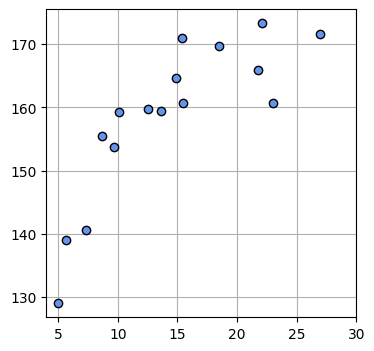

In [ ]:
# 데이터 그래프 ---------------------
plt.figure(figsize=(4, 4))
plt.plot(X, T, marker='o', linestyle='None',
         markeredgecolor='black', color='cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

### 5.1.1 직선 모델
- 어느 정도 오차를 허용한다면 주어진 데이터에 직선을 긋는 걸로 데이터를 그럴듯하게 예측 가능

### 5.1.2 제곱 오차 함수


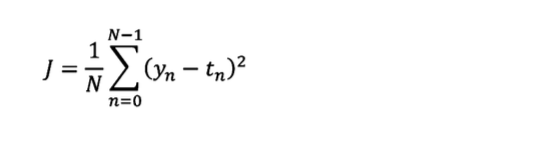

- J: 평균 제곱 오차(mean square error, MSE)
    - 오차의 크기가 N에 의존하지 않음</br>(↔️ N으로 나누지 않는 제곱 합계 오차, sum-of-squares error)

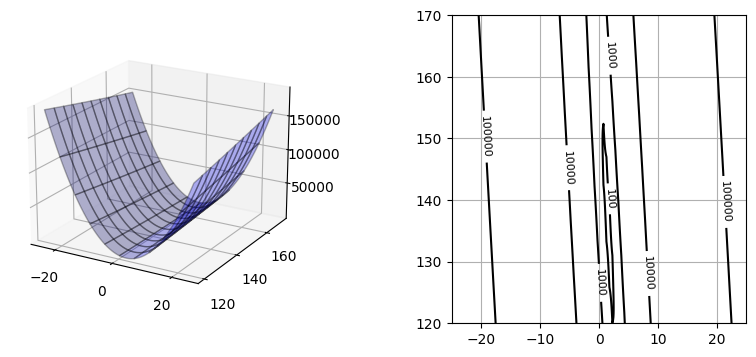

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# 평균 오차 함수 -----------
def mse_line(x, t, w): ### 입력변수, 목표 변수, 가중치
    y = w[0] * x + w[1]
    mse = np.mean((y-t)**2)
    return mse

# 계산 -------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

### 평균 제곱 오차 저장할 배열 초기화
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        ### 인덱스에 주의
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 --------------------
plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace = 0.5)

### 평균 제곱 오차 그래프
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(xx0, xx1, J, rstride=10, cstride=10, alpha=0.3,
                color = 'blue', edgecolor='black')
### 눈금 설정
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
### 등고선 그래프
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels = [100, 1000, 10000, 100000])
cont.clabel(fmt='%1.0f', fontsize=8)
plt.grid(True)
plt.show()

- w 공간에서의 평균 제곱 오차: 계곡과 같은 모양!
    - w0(-25~25)의 방향 변화에 따라 J가 크게 변하는 것을 알 수 있음
    - 하지만 3D 그래프에서는 w1 방향의 변화를 알기 힘듦 ➡️ 등고선 그래프

- 등고선 그래프를 확인해보면 계곡의 바닥도 절편 w1 방향으로 높이가 변화

➡️ w0 = 3, w1 = 135 근처에서 J가 최솟값을 취할 것이라고 판단 가능

### 5.1.3 매개 변수 구하기 (경사 하강법)
- 경사 하강법의 기본 아이디어: 함수의 기울기를 구하여 기울기가 낮은 쪽으로 계속 이동키는 과정을 극값에 이를 때까지 반복

1. 초기 위치로 적당한 w0와 w1을 결정 (J 지형 위의 한 점과 대응)
2. 해당 지점에서의 기울기를 확인하고 J가 가장 감소하는 방향으로 w0와 w1을 조금만 진행
3. 2번 과정을 반복하면 최종적으로 J가 가장 작아지는 '그릇의 바닥'인 w0와 w1에 도착 가능

- 이때 어느 지점에서의 언덕 위쪽 방향은 J를 w0와 w1으로 편미분한 벡터로 표시됨 ➡️ J의 기울기, J를 최소화하기 위해서는 J의 기울기의 반대방향으로 진행해야함
- 학습률(a): 양수 값을 취하는 매개 변수, w 갱신의 폭을 조절함
    - 학습률이 클 경우 갱신은 커지지만 수습이 어려워지므로 적당히 줄여아함

    AFTER: 학습률 a는 하이퍼파라미터

In [ ]:
# 평균 제곱 오차의 기울기 ----------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y-t) * x)
    d_w1 = 2 * np.mean(y-t)
    return d_w0, d_w1

In [ ]:
### w = [10, 165]의 기울기
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1)) ### w0 방향과 w1 방향의 기울기

[5046.3  301.8]


반복 횟수 13820
W=[1.539947, 136.176160]
dMSE[-0.005794, 0.099991]
MSE=49.027452


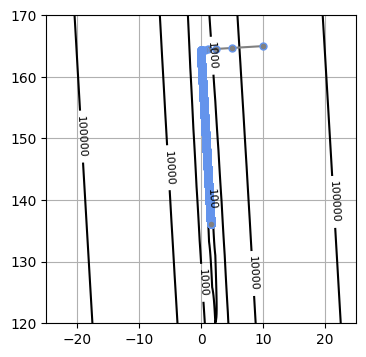

In [ ]:
# 경사 하강법 --------------------------

def fit_line_num(x, t):
    ### 초기설정
    w_init = [10.0, 165.0] # 초기 매개 변수
    alpha = 0.001 # 학습률
    i_max = 100000 # 반복의 최대 수
    eps = 0.1 # 반복을 종료, 기울기의 절대값의 한계
    w_i = np.zeros([i_max, 2])
    w_i[0, :] = w_init

    ### 가중치 갱신
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i-1])
        w_i[i, 0] = w_i[i-1, 0] - alpha*dmse[0]
        w_i[i, 1] = w_i[i-1, 1] - alpha*dmse[1]
        ### 기울기의 각 요소의 절대값이 eps = 0.1보다 작으면 종료판정
        ### w가 평평한 곳에 도달했다고(기울기가 충분히 적어졌다고) 판단
        if max(np.absolute(dmse)) < eps: # 종료 판정, np.absolute는 절대값
            break
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    return w0, w1, dmse, w_i

# 메인 ---------------------------------
plt.figure(figsize=(4, 4)) # MSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)

J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for i1 in range(xn):
        ### 인덱스 주의
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

### 등고선 그래프
cont = plt.contour(xx0, xx1, J, 30, colors='black',
                   levels=(100, 1000, 10000, 100000))
cont.clabel(fmt = '%1.0f', fontsize=8)
plt.grid(True)

# 경사 하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과 보기
print('반복 횟수 {0}'.format(W_history.shape[0]))
print('W=[{0:.6f}, {1:.6f}]'.format(W0, W1))
print('dMSE[{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE={0:.6f}'.format(mse_line(X, T, [W0, W1])))
plt.plot(W_history[:, 0], W_history[:, 1], '.-',
         color='gray', markersize=10, markeredgecolor='cornflowerblue')
plt.show()

- 처음에는 가파른 계곡으로 진행
- 골짜기에 정착하면 계곡의 중앙 부근에 천천히 나아가서 기울기가 거의 없어지는 지점에 도달

w0 = 1.540, w1 = 136.176
SD = 7.002 cm


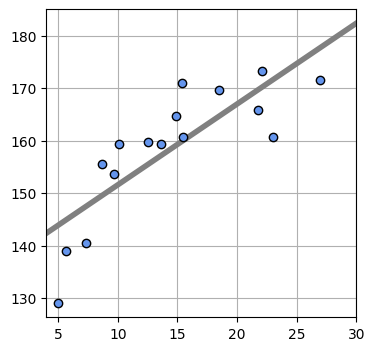

In [ ]:
# 선 표시 ---------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y = w[0] * xb + w[1]
    plt.plot(xb, y, color=(.5, .5, .5), linewidth=4)

# 메인 ------------------------
plt.figure(figsize=(4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W0, W1))
print("SD = {0:.3f} cm".format(np.sqrt(mse)))

show_line(W)

plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

- 평균 제곱 오차의 제곱근: 표준 편차 (SD)
    - 오차가 대략 7cm = 오차가 정규 분호를 따른다고 가정했을 때, 전체의 68%의 데이터 점에서 오차가 7.00cm 이하라는 뜻

**주의할 점** 일반적으로 경사하강법으로 구해지는 해는 극솟값임 ➡️ 최솟값이 아님!
- 따라서 J가 복잡한 모양을 하고 있을 때 가장 깊은 최솟값을 구하는 것은 매우 어려움
- 다양한 초기값에서 여러 번의 경사하강법을 시도, 그 중 가장 J가 작아진 지점을 최솟값으로 채택하는 근사적 방법도 존재
- 현재는 J가 w0와 w1의 2차함수기 때문에 최솟값이 하나만 존재

### 5.1.4 선형 모델 매개 변수의 해석해
- 수치해: 경사하강법과 같이 반복 계산에 의해 근사값을 구하는 수치 계산법
- 해석해: 근사적인 해석이 아니라 방정식을 해결하여 정확한 풀이가 가능 (해석적으로 풀이가 가능한 해)
    - 1회 계산으로 최적의 w를 구할 수 있음
    - 계산 시간도 빠르고 답도 정확함
    - 문제의 본질을 잘 이해할 수 있음
    - 다차원 데이터에 대응하며 곡선 모델로 확장하기 좋음
    - 커널법 등의 이해를 도와줌
    https://process-mining.tistory.com/95

w0 = 1.558, w1 = 135.872
SD = 7.001 cm


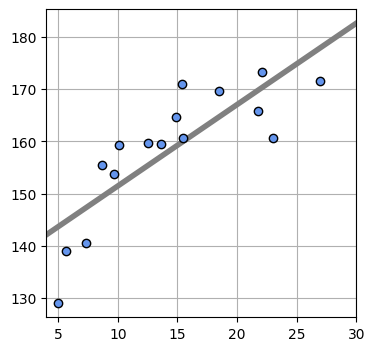

In [ ]:
# 해석해 -----------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    w0 = (mtx - mt * mx) / (mxx - mx**2)
    w1 = mt - w0 * mx
    return np.array([w0, w1])

# 메인 -------------------------
W = fit_line(X, T)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize=(4, 4))
show_line(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

경사하강법과 거의 같은 결과

## 5.2 2차원 입력면 모델

In [ ]:
# 2차원 데이터 생성 -------------
X0 = X ### 원래 나이 x
X0_min = 5
X0_max = 30

np.random.seed(seed = 1) # 난수를 고정

### 새로운 몸무게 데이터
X1 = 23 * (T / 100)**2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [ ]:
print(np.round(X0, 2))
print(np.round (X1, 2))
print(np.round (T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


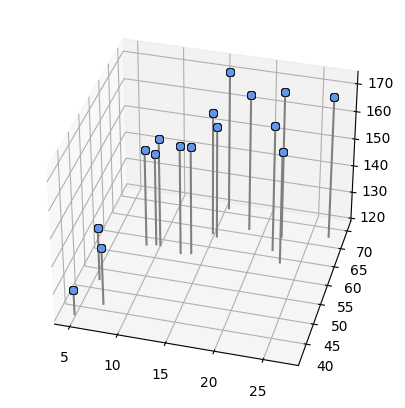

In [ ]:
# 2차원 데이터의 표시 -----------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [120, t[i]], color='gray')
        ax.plot(x0, x1, t, 'o',
                color='cornflowerblue', markeredgecolor='black',
                markersize=6, markeredgewidth=0.5)
        ax.view_init(elev=35, azim=-75)


# 메인 -----------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
show_data2(ax, X0, X1, T)
plt.show()

나이가 많아질수록, 몸무게가 증가할수록 키가 커짐

### 5.2.1 데이터의 표시 방법
- n: 데이터의 번호
- m: 벡터의 요소 (0 = 나이, 1 = 몸무게 등)

### 5.2.2 면 모델
- 3차원 플롯에서 데이터에 따른 면을 그리면 새로운 나이와 몸무게 데이터에 대해 키를 예측 가능

SD = 12.876 cm


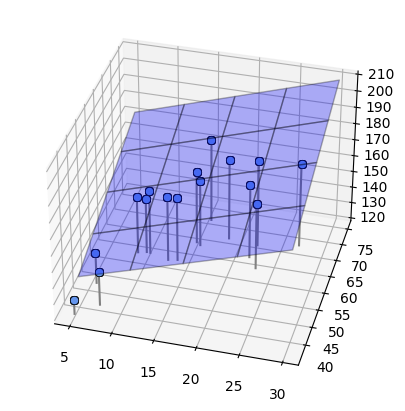

In [ ]:
# 면의 표시 --------------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    px0, px1 = np.meshgrid(px0, px1)
    y = w[0] * px0 + w[1] * px1 + w[2]
    ax.plot_surface(px0, px1, y, rstride=1, cstride=1, alpha=0.3,
                    color='blue', edgecolor='black')

# 면의 MSE ---------------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] * x0 + w[1] * x1 + w[2] # (A)
    mse = np.mean((y - t)**2)
    return mse

# 메인 --------------------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()

### 5.2.3 매개 변수의 해석해
- a와 b의 공분산: a와 b가 서로 얼마나 영향을 끼치고 있는지를 나타냄

w0 = 0.5, w1 = 1.1, w2 = 89.0
SD = 2.546 cm


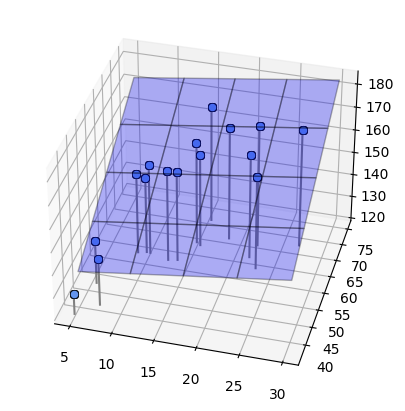

In [ ]:
# 해석해 ------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    return np.array([w0, w1, w2])


# 메인 ---------------------------------
plt.figure(figsize=(6, 5))
ax = plt.subplot(1, 1, 1, projection='3d')
W = fit_plane(X0, X1, T)
print("w0 = {0:.1f}, w1 = {1:.1f}, w2 = {2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()

오차의 SD = 2.55 ➡️ 선 모델일 때의 7cm 보다 오차가 작아짐
- 키를 예측할 때 나이뿐만 아니라 몸무게 정보가 있는 것이 예측 정확도를 높여줌

## 5.3 D차원 선형 회귀 모델
### 5.3.1 D차원 선형 회귀 모델
- 1차원 입력에서의 직선모델, 2차원 입력에서의 면 모델은 모두 선형 회귀모델임</br>


    AFTER: 절편이 없는 경우는 어떤 w더라도 원점을 지나는 평면

### 5.3.2 매개 변수의 해석해
### 5.3.3 원점을 지나지 않는 면에 대한 확장

## 5.4 선형 기저 함수 모델
- 기저 함수: 바탕이 되는 함수
- 여기서는 가우스 함수를 기저함수로 선택

    AFTER: M이 커질 수록 피팅이 잘 되는 이유? M이 커지면 파라미터 개수가 많아짐 (모델이 복잡해짐)
    참고 개념: universal approximation 어떤 함수든 기저함수의 선형결합으로 표현 가능하다, one hidden layer로 모든 함수를 근사할 수 있다는 이론

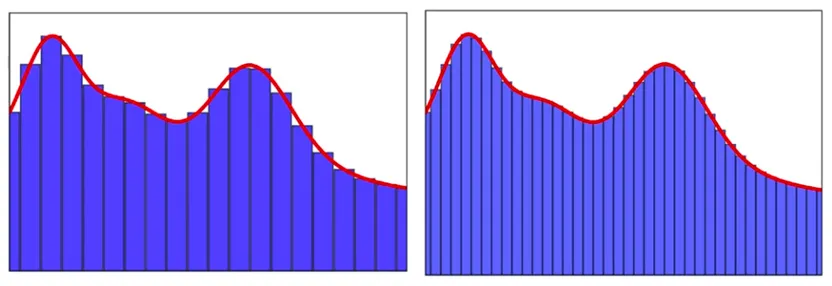

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 데이터 로드 -----------------------
outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

In [ ]:
# 가우스 함수 --------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu)**2 / (2 * s**2))

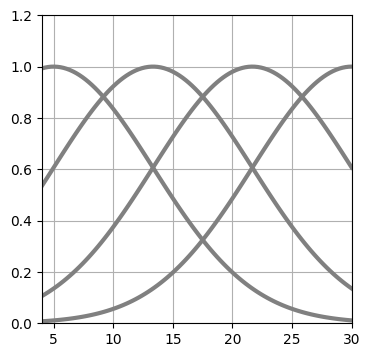

In [ ]:
# 메인 -------------------------------
M = 4 ### 4개의 가우스 함수 (하이퍼파라미터)
plt.figure(figsize=(4, 4))
mu = np.linspace(5, 30, M)

### 인접한 가우스 함수 중심 사이의 거리
s = mu[1] - mu[0] # (A)

xb = np.linspace(X_min, X_max, 100)

for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color='gray', linewidth=3)

plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)
plt.show()

선형 기저 함수 모델
- '전처리'로, 1차원 데이터 xn을 M차원 데이터 벡터 xn - Φ(xn)으로 변환
- M차원 입력 xn에 대해 선형 회귀 모델을 적용
➡️ 즉, 선형 기저 함수 모델은 Φ(xn)를 입력 xn으로 해석한 선형 회귀 모델과 같음

In [ ]:
# 선형 기저 함수 모델 --------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    return y

In [ ]:
# 선형 기저 함수 모델 MSE -----------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
# 선형 기저 함수 모델 정확한 솔루션 --------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)

    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    return w

W = [29.4 75.7  2.9 98.3 54.9]
SD = 3.98 cm


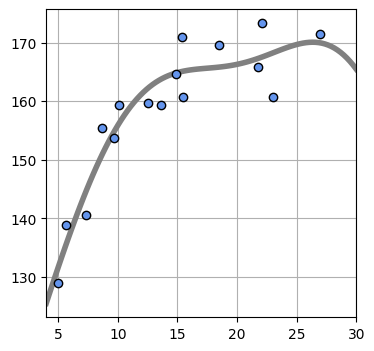

In [ ]:
# 가우스 기저 함수 표시 ------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)

# 메인 --------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W = '+ str(np.round(W, 1)))
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

오차의 SD는 3.98 ➡️ 직선 모델일 때의 오차 7.00cm보다 훨씬 줄어듦

## 5.5 오버피팅의 문제

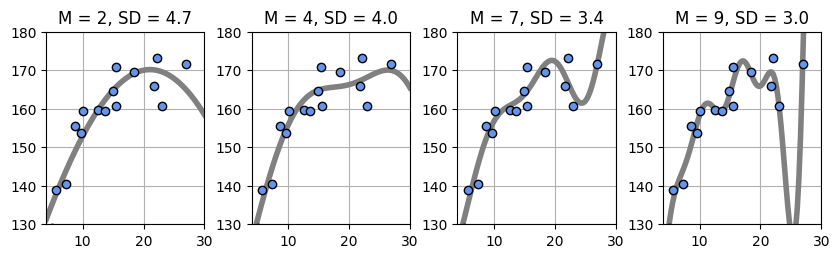

In [ ]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]

for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    mse = mse_gauss_func(X, T, W)

    plt.title("M = {0:d}, SD = {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

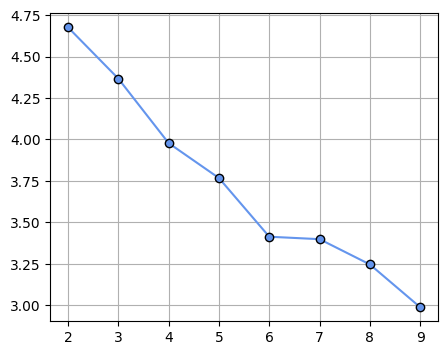

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))

for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))

plt.plot(M, mse2, marker='o',
         color='cornflowerblue', markeredgecolor='black')
plt.grid(True)
plt.show()

M이 증가함에 따라 SD는 줄어들고 있지만, 새로운 데이터에 대한 예측 성능이 나빠짐 ➡️ overfitting

**1. 홀드아웃 검증**

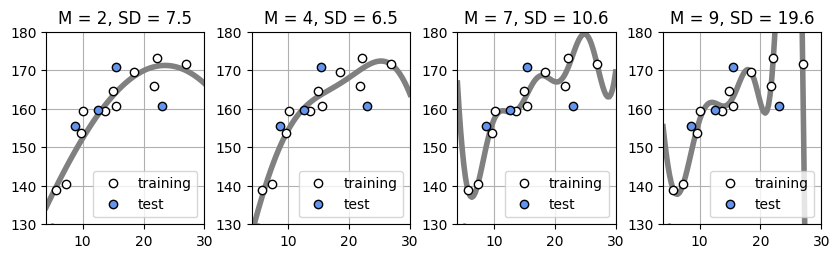

In [ ]:
# 훈련 데이터와 테스트 데이터 ----------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

# 메인 ----------------------------------
plt.figure(figsize=(10, 2.5))

plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    plt.plot(X_train, T_train, marker='o',
             linestyle='None', color='white',
             markeredgecolor='black', label='training')
    plt.plot(X_test, T_test, marker='o', linestyle='None',
             color='cornflowerblue',
             markeredgecolor='black', label='test')
    plt.legend(loc='lower right', fontsize=10, numpoints=1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    ### 테스트 데이터를 가지고 SD 계산
    mse = mse_gauss_func(X_test, T_test, W)
    plt.title("M = {0:d}, SD = {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

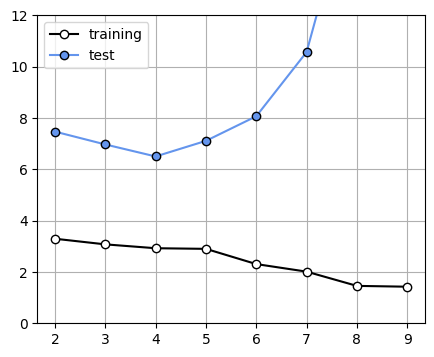

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))

plt.plot(M, mse_train, marker='o', linestyle='-',
         markerfacecolor='white', markeredgecolor='black',
         color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black',
         label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()

M이 늘어나면 훈련 데이터의 오차는 감소하지만, 테스트 데이터의 오차는 M=4까지 내려간 후 M=5부터 증가 </br>
➡️ M=5에서 오버피팅 일어나고 있음
- 따라서 해당 홀드아웃 검증에서는 M=4의 경우가 데이터에 가장 적합

**2. K겹 교차 검증**

In [ ]:
# K겹 교차 검증 -------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)

    for i in range(0, k):
        ### range(n)으로 설정하면 0부터 k-1까지를 반복하는 n개의 리스트를 얻을 수 있음
        x_train = x[np.fmod(range(n), k) != i] # (A)
        t_train = t[np.fmod(range(n), k) != i] # (A)
        x_test = x[np.fmod(range(n), k) == i] # (A)
        t_test = t[np.fmod(range(n), k) == i] # (A)
        wm = fit_gauss_func(x_train, t_train, m)
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i] = mse_gauss_func(x_test, t_test, wm)
    return mse_train, mse_test

In [ ]:
np.fmod(range(10), 5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:
M = 4 ### 기저의 수 (가우스 함수의 수)
K = 4 ### 분할 수
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

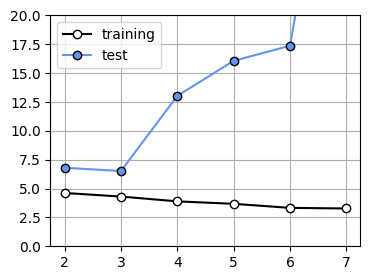

In [ ]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))

for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))

plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

LOOCV(leave-one-out cross validation, 테스트 데이터의 크기 1)에서는 M=3이 가장 적합!

SD = 4.37 cm


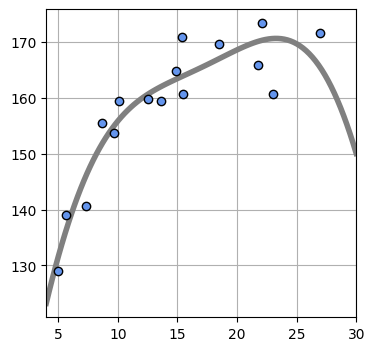

In [ ]:
M = 3 ### 최적의 M 사용
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

교차검증
- 데이터의 수가 적은 경우 유용
- 데이터 수가 많으면 계산 시간이 많이 걸림 (계산 비용 ⬆️)

홀드아웃 검증
- 데이터 수가 많아 계산 시간이 많이 걸릴 때 사용하면 유용함
- 데이터의 수가 크면 홀드아웃 검증과 교차 검증의 결과가 비슷해짐


    AFTER: 홀드아웃 검증에서는 데이터 수가 적을 때, 분할에 따른 오차가 커질 수 있음
           따라서 K겹 교차 검증 사용

## 5.6 새로운 모델의 생성

In [ ]:
# 모델 A ------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y

# 모델 A 표시 ---------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw = 4)

# 모델 A의 MSE --------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
### 해당 함수는 최솟값을 구하는 함수와 매개 변수의 초기값만 주면,
### 함수의 미분을 주지 않아도 매개 변수의 극솟값을 출력
from scipy.optimize import minimize

# 모델 A의 매개 변수 최적화 -----------------
def fit_model_A(w_init, x, t): ### 변수의 초기값, 입력 데이터, 목표 데이터
    ### 최소화할 목표 함수, w의 초기값, 목표 함수를 최적화하는 매개변수 w 이외의 인수인 x, t
    ### 옵션으로는 구배(gradient)를 사용하지 않는 최적화 방법인 파웰 알고리즘 지정
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0 = 169.0, w1 = 113.7, w2 = 0.2
SD = 3.86 cm


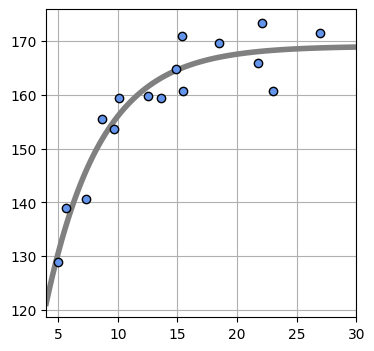

In [ ]:
# 메인 ----------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0 = {0:.1f}, w1 = {1:.1f}, w2 = {2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

직선 모델일 때와, M=3의 선형 기저 함수 모델일 때의 오차보다도 더 낮은 값의 오차를 출력함

## 5.7 모델의 선택

    AFTER: 미지의 데이터에 대한 예측 결과(성능)으로 모델을 선택

Gauss(M=3) SD = 6.51 cm
Model A SD = 4.72 cm


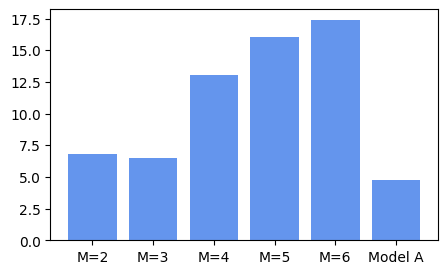

In [ ]:
# 교차 검증 model_A -------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test

# 메인 -------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD = {0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD = {0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center", facecolor="cornflowerblue")
plt.show()

M=3의 선형 기저 함수 모델보다 모델 A의 SD가 더 낮음 ➡️ 모델 A가 데이터에 더 잘 어울린다

## 5.8 정리

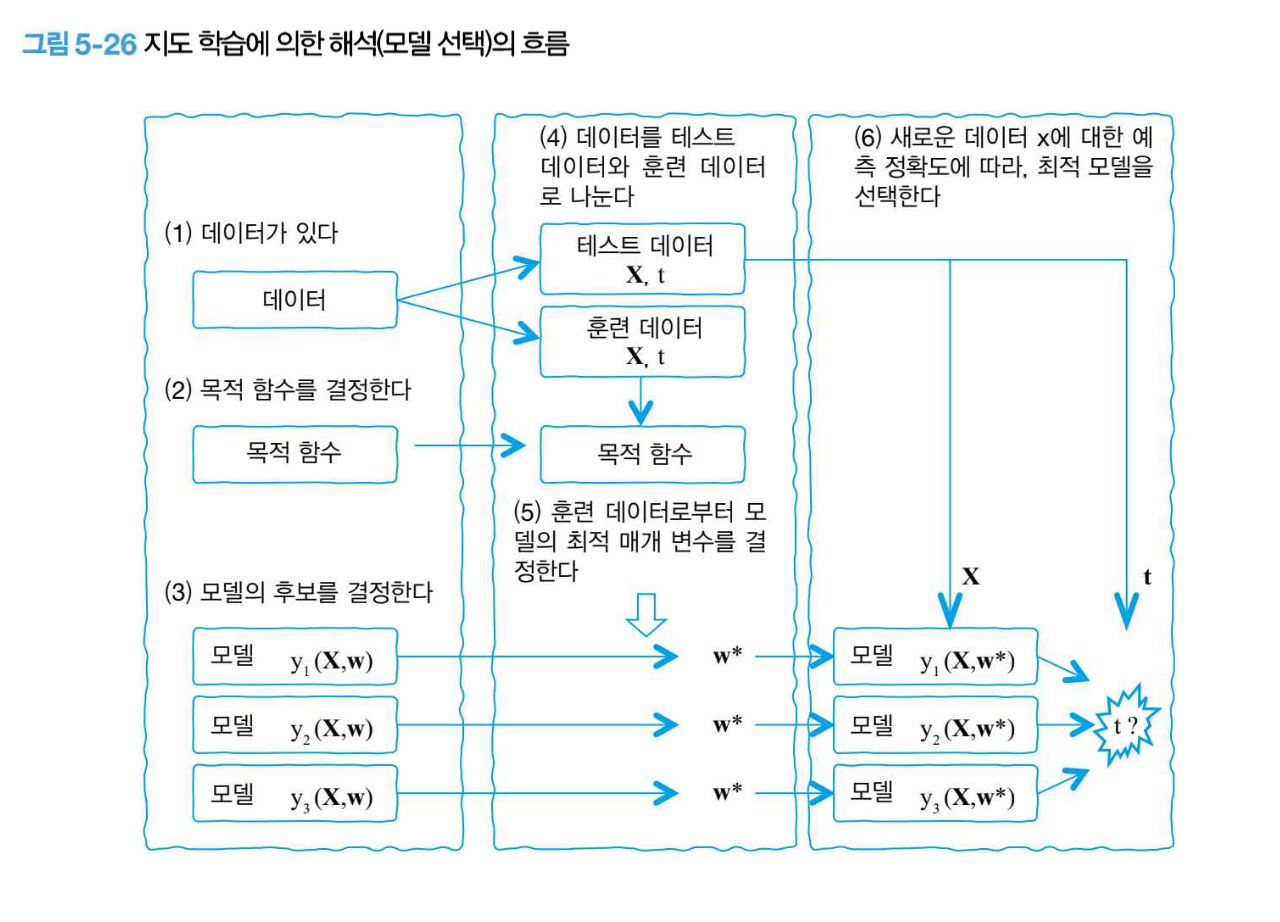